In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/dataset.xlsx


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
def load_and_preprocess_data(data_path):
    
    data = pd.read_excel(data_path)
    
    data['labels'] = pd.to_numeric(data['labels'])
    data['timestamp'] = pd.to_numeric(data['timestamp'])
    data['frequency'] = pd.to_numeric(data['frequency'])
    labels = data.iloc[:, 0].values 
    features = data.iloc[:, 1:].values  

    
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    return features, labels

data_path = '/kaggle/input/dataset1/dataset.xlsx'


X, y = load_and_preprocess_data(data_path)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:

# Build the sequential model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Continue with testing and deployment steps as needed

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
576/576 [==============================] - 3s 4ms/step - loss: -1.6336 - accuracy: 0.9789 - val_loss: -6.9363 - val_accuracy: 0.9872
Epoch 2/10
576/576 [==============================] - 2s 3ms/step - loss: -25.2546 - accuracy: 0.9848 - val_loss: -54.5075 - val_accuracy: 0.987

In [4]:
predictions = model.predict(X_val)


145/145 [==============================] - 1s 3ms/step


[[4550    0]
 [  59    0]]


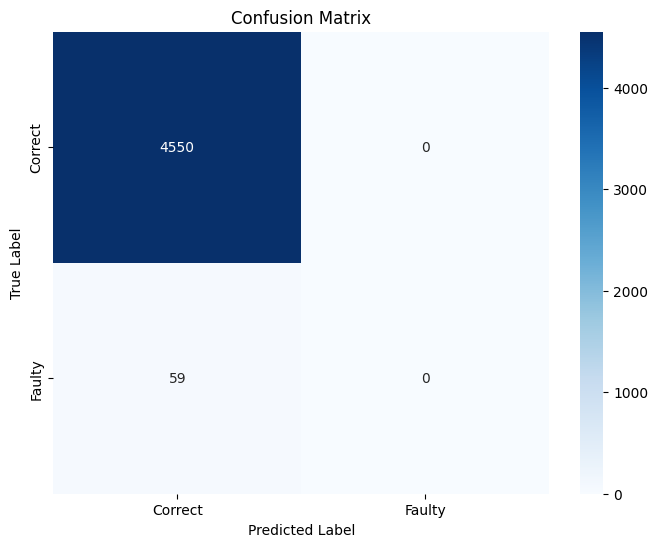

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the true labels for the test set, and 'binary_predictions' contains the model's binary predictions

# Compute confusion matrix
cm = confusion_matrix(y_val, predictions)

print(cm)
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Correct', 'Faulty'], yticklabels=['Correct', 'Faulty'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [6]:
# Assuming binary classification
binary_predictions = (predictions > 0.5).astype(int)

# Print the binary predictions
print("Binary Predictions:", binary_predictions)


Binary Predictions: [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
